In [2]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 15.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

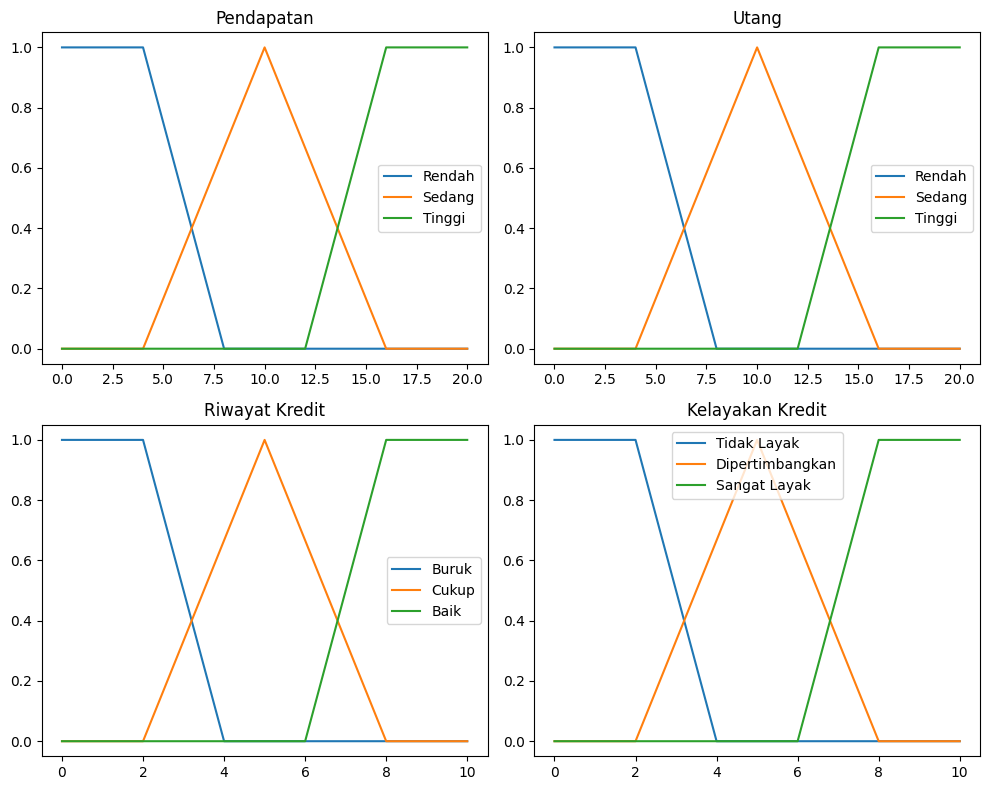

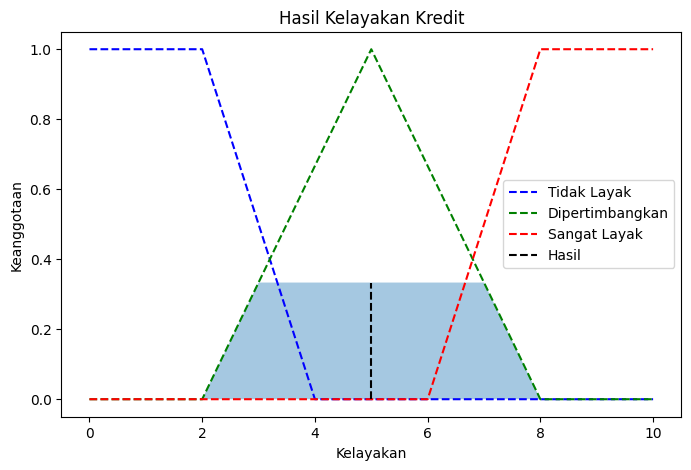

Kelayakan Kredit (final): 5.00


In [4]:
pendapatan = np.arange(0, 21, 1)
pendapatan_rendah = fuzz.trapmf(pendapatan, [0, 0, 4, 8])
pendapatan_sedang = fuzz.trimf(pendapatan, [4, 10, 16])
pendapatan_tinggi = fuzz.trapmf(pendapatan, [12, 16, 20, 20])

# Utang (dalam juta Rupiah)
utang = np.arange(0, 21, 1)
utang_rendah = fuzz.trapmf(utang, [0, 0, 4, 8])
utang_sedang = fuzz.trimf(utang, [4, 10, 16])
utang_tinggi = fuzz.trapmf(utang, [12, 16, 20, 20])

# Riwayat kredit (skor 0-10)
kredit = np.arange(0, 11, 1)
kredit_buruk = fuzz.trapmf(kredit, [0, 0, 2, 4])
kredit_cukup = fuzz.trimf(kredit, [2, 5, 8])
kredit_baik = fuzz.trapmf(kredit, [6, 8, 10, 10])

# Kelayakan (0-10)
kelayakan = np.arange(0, 11, 1)
kelayakan_tidak_layak = fuzz.trapmf(kelayakan, [0, 0, 2, 4])
kelayakan_dipertimbangkan = fuzz.trimf(kelayakan, [2, 5, 8])
kelayakan_sangat_layak = fuzz.trapmf(kelayakan, [6, 8, 10, 10])

# 2. Visualisasi variabel fuzzy
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].plot(pendapatan, pendapatan_rendah, label='Rendah')
axs[0, 0].plot(pendapatan, pendapatan_sedang, label='Sedang')
axs[0, 0].plot(pendapatan, pendapatan_tinggi, label='Tinggi')
axs[0, 0].set_title('Pendapatan')
axs[0, 0].legend()

axs[0, 1].plot(utang, utang_rendah, label='Rendah')
axs[0, 1].plot(utang, utang_sedang, label='Sedang')
axs[0, 1].plot(utang, utang_tinggi, label='Tinggi')
axs[0, 1].set_title('Utang')
axs[0, 1].legend()

axs[1, 0].plot(kredit, kredit_buruk, label='Buruk')
axs[1, 0].plot(kredit, kredit_cukup, label='Cukup')
axs[1, 0].plot(kredit, kredit_baik, label='Baik')
axs[1, 0].set_title('Riwayat Kredit')
axs[1, 0].legend()

axs[1, 1].plot(kelayakan, kelayakan_tidak_layak, label='Tidak Layak')
axs[1, 1].plot(kelayakan, kelayakan_dipertimbangkan, label='Dipertimbangkan')
axs[1, 1].plot(kelayakan, kelayakan_sangat_layak, label='Sangat Layak')
axs[1, 1].set_title('Kelayakan Kredit')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

# 3. Fuzzifikasi input
pendapatan_input = 12  # dalam juta
utang_input = 6        # dalam juta
kredit_input = 7       # skor

pendapatan_level_rendah = fuzz.interp_membership(pendapatan, pendapatan_rendah, pendapatan_input)
pendapatan_level_sedang = fuzz.interp_membership(pendapatan, pendapatan_sedang, pendapatan_input)
pendapatan_level_tinggi = fuzz.interp_membership(pendapatan, pendapatan_tinggi, pendapatan_input)

utang_level_rendah = fuzz.interp_membership(utang, utang_rendah, utang_input)
utang_level_sedang = fuzz.interp_membership(utang, utang_sedang, utang_input)
utang_level_tinggi = fuzz.interp_membership(utang, utang_tinggi, utang_input)

kredit_level_buruk = fuzz.interp_membership(kredit, kredit_buruk, kredit_input)
kredit_level_cukup = fuzz.interp_membership(kredit, kredit_cukup, kredit_input)
kredit_level_baik = fuzz.interp_membership(kredit, kredit_baik, kredit_input)

# 4. Inferensi fuzzy
rule1 = np.fmin(pendapatan_level_rendah, utang_level_tinggi)
kelayakan_rule1 = np.fmin(rule1, kelayakan_tidak_layak)

rule2 = np.fmin(pendapatan_level_sedang, utang_level_sedang)
kelayakan_rule2 = np.fmin(rule2, kelayakan_dipertimbangkan)

rule3 = np.fmin(pendapatan_level_tinggi, kredit_level_baik)
kelayakan_rule3 = np.fmin(rule3, kelayakan_sangat_layak)

aggregated = np.fmax(kelayakan_rule1, np.fmax(kelayakan_rule2, kelayakan_rule3))

# 5. Defuzzifikasi
kelayakan_final = fuzz.defuzz(kelayakan, aggregated, 'centroid')
kelayakan_activation = fuzz.interp_membership(kelayakan, aggregated, kelayakan_final)

# 6. Visualisasi hasil
plt.figure(figsize=(8, 5))
plt.plot(kelayakan, kelayakan_tidak_layak, 'b', linestyle='--', label='Tidak Layak')
plt.plot(kelayakan, kelayakan_dipertimbangkan, 'g', linestyle='--', label='Dipertimbangkan')
plt.plot(kelayakan, kelayakan_sangat_layak, 'r', linestyle='--', label='Sangat Layak')
plt.fill_between(kelayakan, 0, aggregated, alpha=0.4)
plt.plot([kelayakan_final, kelayakan_final], [0, kelayakan_activation], 'k', linestyle='--', label='Hasil')
plt.title('Hasil Kelayakan Kredit')
plt.xlabel('Kelayakan')
plt.ylabel('Keanggotaan')
plt.legend()
plt.show()

print(f"Kelayakan Kredit (final): {kelayakan_final:.2f}")